In [ ]:
!pip install tensorflow-gpu
!pip install nltk
!pip install sklearn

     |████████████████████████████████| 394.7MB 44kB/s 
     |████████████████████████████████| 14.5MB 253kB/s 
     |████████████████████████████████| 10.6MB 51.8MB/s 
     |████████████████████████████████| 471kB 58.6MB/s 
     |████████████████████████████████| 3.8MB 40.7MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.4.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: grpcio 1.34.0
    Uninstalling grpcio-1.34.0:
      Successfully uninstalled grpcio-

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahidzain","key":"05e2a624bec713ff54b0e1f9a1167dad"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

 81% 33.0M/41.0M [00:00<00:00, 70.4MB/s]
100% 41.0M/41.0M [00:00<00:00, 118MB/s] 


In [ ]:
!unzip /content/fake-and-real-news-dataset.zip -d "/content/drive/MyDrive"

Archive:  /content/fake-and-real-news-dataset.zip
replace /content/drive/MyDrive/Fake.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/Fake.csv  
replace /content/drive/MyDrive/True.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace /content/drive/MyDrive/True.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/drive/MyDrive/True.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM
import tensorflow as tf

In [ ]:
true=pd.read_csv("/content/drive/MyDrive/True.csv")
false=pd.read_csv("/content/drive/MyDrive/Fake.csv")

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
false.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true['category']=1
false['category']=0

df=pd.concat([true,false],axis=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


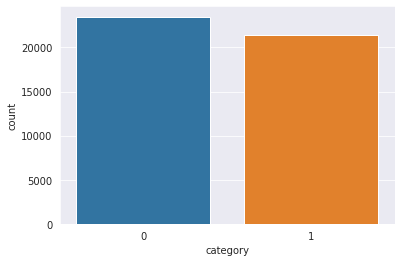

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df.category)

In [ ]:
!nvidia-smi

Thu Dec 17 17:04:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
df.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

[Text(0, 0, 'politicsNews'),
 Text(0, 0, 'worldnews'),
 Text(0, 0, 'News'),
 Text(0, 0, 'politics'),
 Text(0, 0, 'Government News'),
 Text(0, 0, 'left-news'),
 Text(0, 0, 'US_News'),
 Text(0, 0, 'Middle-east')]

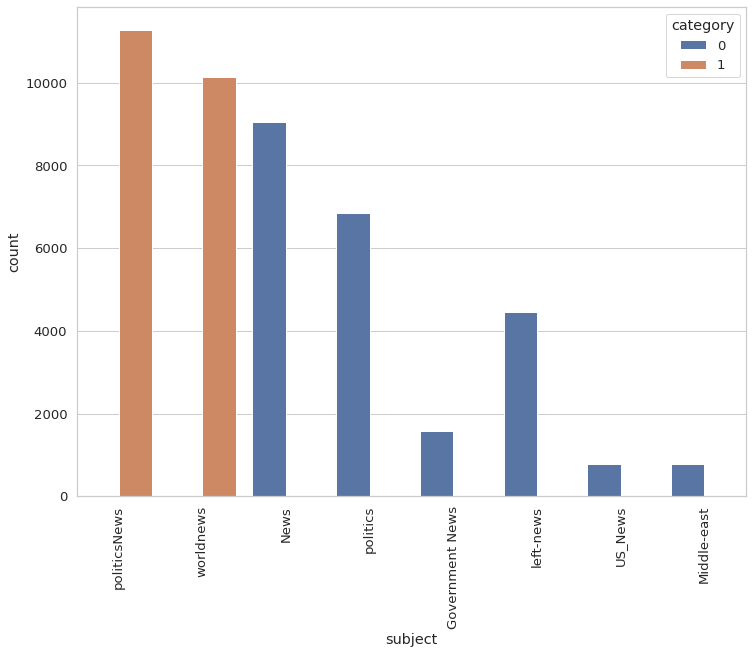

In [ ]:
plt.figure(figsize=(12,9))
sns.set(style="whitegrid",font_scale=1.2)
chart=sns.countplot(x='subject',hue='category',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
df['text']=df['text']+" "+df['title']
del df['title']
del df['subject']
del df['date']

df.head()

,text,category
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [ ]:
!pip install string
import string
nltk.download("stopwords")
stop=set(stopwords.words('english'))
punctuation=list(string.punctuation)
stop.update(punctuation)

ERROR: Could not find a version that satisfies the requirement string (from versions: none)
ERROR: No matching distribution found for string
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from bs4 import BeautifulSoup

def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['text']=df['text'].apply(denoise_text)

In [ ]:
def get_corpus(text):
    words=[]
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus=get_corpus(df.text)

In [ ]:
from collections import Counter
counter=Counter(corpus)
most_common=counter.most_common(10)
most_common=dict(most_common)
most_common

{'Donald': 27795,
 'President': 33180,
 'Trump': 111503,
 'U.S.': 50441,
 'also': 30325,
 'one': 29370,
 'people': 33115,
 'said': 93162,
 'said.': 26194,
 'would': 54613}

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(df.text,df.category,test_size=0.2,random_state=0)

In [ ]:
max_features = 10000
maxlen = 300

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(xtrain)
tokenized_train=tokenizer.texts_to_sequences(xtrain)
xtrain=sequence.pad_sequences(tokenized_train,maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(xtest)
xtest = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

batch_size = 256
epochs = 10
embed_size = 100

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [ ]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(max_features, output_dim=embed_size, input_length=maxlen, trainable=False))
#LSTM 
model.add(LSTM(units=128 , return_sequences = True , recurrent_dropout = 0.25 , dropout = 0.25))
model.add(LSTM(units=64 , recurrent_dropout = 0.1 , dropout = 0.1))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 300, 128)          117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,168,769
Trainable params: 168,769
Non-trainable params: 1,000,000
_________________________________________________________________


In [ ]:
history=model.fit(xtrain, ytrain, batch_size = batch_size , validation_data = (xtest,ytest) , epochs = epochs , callbacks = [learning_rate_reduction])

Epoch 1/10
141/141 [==============================] - 514s 4s/step - loss: 0.5159 - accuracy: 0.7143 - val_loss: 0.1838 - val_accuracy: 0.9303
Epoch 2/10
141/141 [==============================] - 488s 3s/step - loss: 0.2085 - accuracy: 0.9150 - val_loss: 0.1420 - val_accuracy: 0.9476
Epoch 3/10
141/141 [==============================] - 521s 4s/step - loss: 0.2029 - accuracy: 0.9264 - val_loss: 0.1688 - val_accuracy: 0.9360
Epoch 4/10
141/141 [==============================] - 526s 4s/step - loss: 0.1546 - accuracy: 0.9386 - val_loss: 0.0438 - val_accuracy: 0.9822
Epoch 5/10
141/141 [==============================] - 520s 4s/step - loss: 0.0380 - accuracy: 0.9860 - val_loss: 0.0335 - val_accuracy: 0.9889
Epoch 6/10
141/141 [==============================] - 521s 4s/step - loss: 0.0335 - accuracy: 0.9875 - val_loss: 0.0197 - val_accuracy: 0.9930
Epoch 7/10
141/141 [==============================] - 525s 4s/step - loss: 0.0248 - accuracy: 0.9912 - val_loss: 0.0303 - val_accuracy: 0.9870